Project_1

# ===== Cleaning the Data ====

In [81]:
#import our dependencies 
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

In [82]:
# Create pathway to csv, read csv, and create a df
survey_data = "./survey_results_public.csv"
survey_df = pd.read_csv(survey_data)
survey_df.head(5)

/Users/williewiedenmann/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [83]:
# select the columns needed for analysis 
new_survey_df = survey_df[['Country' ,'Salary','Currency','Gender','JobSatisfaction','EducationParents', 'Age', 'RaceEthnicity', 'JobSearchStatus', 'LastNewJob', 'LanguageWorkedWith']]
# create a new df with the the above desired columns 
new_survey_df.head()

,Country,Salary,Currency,Gender,JobSatisfaction,EducationParents,Age,RaceEthnicity,JobSearchStatus,LastNewJob,LanguageWorkedWith
0,Kenya,NaN,NaN,Male,Extremely satisfied,"Bachelor’s degree (BA, BS, B.Eng., etc.)",25 - 34 years old,Black or of African descent,"I’m not actively looking, but I am open to new...",Less than a year ago,JavaScript;Python;HTML;CSS
1,United Kingdom,51000,British pounds sterling (£),Male,Moderately dissatisfied,"Bachelor’s degree (BA, BS, B.Eng., etc.)",35 - 44 years old,White or of European descent,I am actively looking for a job,More than 4 years ago,JavaScript;Python;Bash/Shell
2,United States,NaN,NaN,NaN,Moderately satisfied,NaN,NaN,NaN,"I’m not actively looking, but I am open to new...",Less than a year ago,NaN
3,United States,NaN,U.S. dollars ($),Male,Neither satisfied nor dissatisfied,Some college/university study without earning ...,35 - 44 years old,White or of European descent,"I’m not actively looking, but I am open to new...",Less than a year ago,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell
4,South Africa,260000,South African rands (R),Male,Slightly satisfied,Some college/university study without earning ...,18 - 24 years old,White or of European descent,"I’m not actively looking, but I am open to new...",Between 1 and 2 years ago,C;C++;Java;Matlab;R;SQL;Bash/Shell


In [84]:
#drop all nan value from df
clean_df = new_survey_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
clean_df.head()

,Country,Salary,Currency,Gender,JobSatisfaction,EducationParents,Age,RaceEthnicity,JobSearchStatus,LastNewJob,LanguageWorkedWith
1,United Kingdom,51000,British pounds sterling (£),Male,Moderately dissatisfied,"Bachelor’s degree (BA, BS, B.Eng., etc.)",35 - 44 years old,White or of European descent,I am actively looking for a job,More than 4 years ago,JavaScript;Python;Bash/Shell
4,South Africa,260000,South African rands (R),Male,Slightly satisfied,Some college/university study without earning ...,18 - 24 years old,White or of European descent,"I’m not actively looking, but I am open to new...",Between 1 and 2 years ago,C;C++;Java;Matlab;R;SQL;Bash/Shell
5,United Kingdom,30000,British pounds sterling (£),Male,Moderately satisfied,"Secondary school (e.g. American high school, G...",18 - 24 years old,White or of European descent,I am actively looking for a job,Between 2 and 4 years ago,Java;JavaScript;Python;TypeScript;HTML;CSS
6,United States,120000,U.S. dollars ($),Male,Slightly satisfied,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",18 - 24 years old,White or of European descent,"I’m not actively looking, but I am open to new...",Less than a year ago,JavaScript;HTML;CSS
8,United States,250000,U.S. dollars ($),Male,Moderately satisfied,Some college/university study without earning ...,35 - 44 years old,White or of European descent,"I’m not actively looking, but I am open to new...",Between 2 and 4 years ago,Assembly;CoffeeScript;Erlang;Go;JavaScript;Lua...


In [85]:
#convert to Salary column into an int to perform calculations
clean_df["Salary"] = pd.to_numeric(clean_df.Salary, errors='coerce')

/Users/williewiedenmann/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [86]:
#Begin review of types of currency in data set 
currency_df = clean_df['Currency'].value_counts(normalize=True) * 100
currency_df
#Focusing analysis on USD, Euros, Indian rupees and British Pounds 
#Convert evrything to USD

U.S. dollars ($)               36.694521
Euros (€)                      25.363132
British pounds sterling (£)     9.284392
Indian rupees (₹)               5.969940
Canadian dollars (C$)           4.534238
Russian rubles (₽)              2.834950
Brazilian reais (R$)            2.776064
Australian dollars (A$)         2.728394
Polish złoty (zł)               2.518086
Swedish kroner (SEK)            1.637597
Swiss francs                    1.160900
Danish krone (kr)               0.886097
Mexican pesos (MXN$)            0.827211
Norwegian krone (kr)            0.790758
South African rands (R)         0.757108
Chinese yuan renminbi (¥)       0.476698
Japanese yen (¥)                0.358925
Singapore dollars (S$)          0.322472
Bitcoin (btc)                   0.078515
Name: Currency, dtype: float64

In [87]:
#make df with Salary and Currency for Conversions 
salary_currency_df = clean_df[['Salary','Currency']]
salary_currency_df.head()


,Salary,Currency
1,51000.0,British pounds sterling (£)
4,260000.0,South African rands (R)
5,30000.0,British pounds sterling (£)
6,120000.0,U.S. dollars ($)
8,250000.0,U.S. dollars ($)


In [88]:
#create df for British pounds
Pounds_df = salary_currency_df.loc[salary_currency_df['Currency'] == 'British pounds sterling (£)']
Pounds_df.head()

,Salary,Currency
1,51000.0,British pounds sterling (£)
5,30000.0,British pounds sterling (£)
22,25.0,British pounds sterling (£)
79,32500.0,British pounds sterling (£)
82,59500.0,British pounds sterling (£)


In [89]:
#Pounds to USD conversion 
Pounds_conv = Pounds_df['Salary'] * 1.23 
Pounds_conv_df = pd.DataFrame(Pounds_conv)
Pounds_conv_df.head()


,Salary
1,62730.00
5,36900.00
22,30.75
79,39975.00
82,73185.00


In [90]:
#create df for Euros 
Euros_df = salary_currency_df.loc[salary_currency_df['Currency'] == 'Euros (€)']
Euros_df.head()

,Salary,Currency
14,0.0,Euros (€)
25,3500.0,Euros (€)
37,2600.0,Euros (€)
53,5000.0,Euros (€)
57,900.0,Euros (€)


In [91]:
#Euros to USD conversion 
Euros_conv = Euros_df['Salary'] * 1.09 
Euros_conv_df = pd.DataFrame(Euros_conv)
Euros_conv_df.head()

,Salary
14,0.0
25,3815.0
37,2834.0
53,5450.0
57,981.0


In [92]:
#create df for Indian rupees (₹) 
Rupee_df = salary_currency_df.loc[salary_currency_df['Currency'] == 'Indian rupees (₹)']
Rupee_df.head()

,Salary,Currency
41,660000.0,Indian rupees (₹)
45,35000.0,Indian rupees (₹)
93,2200000.0,Indian rupees (₹)
95,22000.0,Indian rupees (₹)
106,300000.0,Indian rupees (₹)


In [93]:
#Rupees to USD conversion 
Rupee_conv = Rupee_df['Salary'] * 0.014 
Rupee_conv_df = pd.DataFrame(Rupee_conv)
Rupee_conv_df.head()

,Salary
41,9240.0
45,490.0
93,30800.0
95,308.0
106,4200.0


In [94]:
#create df for USD 
USD_df = salary_currency_df.loc[salary_currency_df['Currency'] == 'U.S. dollars ($)']
USD_df.head()

,Salary,Currency
6,120000.0,U.S. dollars ($)
8,250000.0,U.S. dollars ($)
23,75000.0,U.S. dollars ($)
27,75000.0,U.S. dollars ($)
32,44000.0,U.S. dollars ($)


In [95]:
#USD Conversion
US_conv = USD_df['Salary'] * 1
US_conv_df = pd.DataFrame(US_conv)
US_conv_df.head()

,Salary
6,120000.0
8,250000.0
23,75000.0
27,75000.0
32,44000.0


In [96]:
#Created a merged df with all currencies in USD 
frames = [US_conv_df, Pounds_conv_df, Euros_conv_df, Rupee_conv_df]

merge_df = pd.concat(frames, axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)
merge_df1 = merge_df.rename(columns = {'Salary' : 'Adjusted Salary'})
merge_df1.head()


,Adjusted Salary
6,120000.0
8,250000.0
23,75000.0
27,75000.0
32,44000.0


In [97]:
#display new merged df 
clean_merged = clean_df.join(merge_df1)
clean_merged.head()


,Country,Salary,Currency,Gender,JobSatisfaction,EducationParents,Age,RaceEthnicity,JobSearchStatus,LastNewJob,LanguageWorkedWith,Adjusted Salary
1,United Kingdom,51000.0,British pounds sterling (£),Male,Moderately dissatisfied,"Bachelor’s degree (BA, BS, B.Eng., etc.)",35 - 44 years old,White or of European descent,I am actively looking for a job,More than 4 years ago,JavaScript;Python;Bash/Shell,62730.0
4,South Africa,260000.0,South African rands (R),Male,Slightly satisfied,Some college/university study without earning ...,18 - 24 years old,White or of European descent,"I’m not actively looking, but I am open to new...",Between 1 and 2 years ago,C;C++;Java;Matlab;R;SQL;Bash/Shell,NaN
5,United Kingdom,30000.0,British pounds sterling (£),Male,Moderately satisfied,"Secondary school (e.g. American high school, G...",18 - 24 years old,White or of European descent,I am actively looking for a job,Between 2 and 4 years ago,Java;JavaScript;Python;TypeScript;HTML;CSS,36900.0
6,United States,120000.0,U.S. dollars ($),Male,Slightly satisfied,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",18 - 24 years old,White or of European descent,"I’m not actively looking, but I am open to new...",Less than a year ago,JavaScript;HTML;CSS,120000.0
8,United States,250000.0,U.S. dollars ($),Male,Moderately satisfied,Some college/university study without earning ...,35 - 44 years old,White or of European descent,"I’m not actively looking, but I am open to new...",Between 2 and 4 years ago,Assembly;CoffeeScript;Erlang;Go;JavaScript;Lua...,250000.0


In [98]:
#Drop NaN to focus analysis on the 4 converted currencies
final_df = clean_merged.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
final_df.head()


,Country,Salary,Currency,Gender,JobSatisfaction,EducationParents,Age,RaceEthnicity,JobSearchStatus,LastNewJob,LanguageWorkedWith,Adjusted Salary
1,United Kingdom,51000.0,British pounds sterling (£),Male,Moderately dissatisfied,"Bachelor’s degree (BA, BS, B.Eng., etc.)",35 - 44 years old,White or of European descent,I am actively looking for a job,More than 4 years ago,JavaScript;Python;Bash/Shell,62730.0
5,United Kingdom,30000.0,British pounds sterling (£),Male,Moderately satisfied,"Secondary school (e.g. American high school, G...",18 - 24 years old,White or of European descent,I am actively looking for a job,Between 2 and 4 years ago,Java;JavaScript;Python;TypeScript;HTML;CSS,36900.0
6,United States,120000.0,U.S. dollars ($),Male,Slightly satisfied,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",18 - 24 years old,White or of European descent,"I’m not actively looking, but I am open to new...",Less than a year ago,JavaScript;HTML;CSS,120000.0
8,United States,250000.0,U.S. dollars ($),Male,Moderately satisfied,Some college/university study without earning ...,35 - 44 years old,White or of European descent,"I’m not actively looking, but I am open to new...",Between 2 and 4 years ago,Assembly;CoffeeScript;Erlang;Go;JavaScript;Lua...,250000.0
14,Netherlands,0.0,Euros (€),Male,Neither satisfied nor dissatisfied,Associate degree,18 - 24 years old,White or of European descent,"I’m not actively looking, but I am open to new...",Between 2 and 4 years ago,Java;JavaScript;PHP;VB.NET;HTML;CSS,0.0


In [99]:
#Limmit gender column to just male and female responses 
final_df1 = final_df[final_df.Gender != "Non-binary, genderqueer, or gender non-conforming"]
final_df2 = final_df1[final_df1.Gender != "Female;Transgender"]
final_df3 = final_df2[final_df2.Gender != "Male;Non-binary, genderqueer, or gender non-conforming"]
final_df4 = final_df3[final_df3.Gender != "Transgender"]
final_df5 = final_df4[final_df4.Gender != "Female;Non-binary, genderqueer, or gender non-conforming"]
final_df6 = final_df5[final_df5.Gender != "Transgender;Non-binary, genderqueer, or gender non-conforming"]
final_df7 = final_df6[final_df6.Gender != "Male;Transgender"]
final_df8 = final_df7[final_df7.Gender != "Female;Male"]
final_df9 = final_df8[final_df8.Gender != "Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming"]
final_df10 = final_df9[final_df9.Gender != "Female;Male;Transgender"]
final_df11 = final_df10[final_df10.Gender != "Male;Transgender;Non-binary, genderqueer, or gender non-conforming"]
final_df12 = final_df11[final_df11.Gender != "Female;Transgender;Non-binary, genderqueer, or gender non-conforming"]



In [100]:
#Dsiplay % of Genders
final_df13 = final_df12['Gender'].value_counts(normalize=True) * 100
final_df13

Male      93.929653
Female     6.070347
Name: Gender, dtype: float64

In [101]:
#Dsiplay % of Race & Gender
RaEth_df = final_df12['RaceEthnicity'].value_counts(normalize=True) * 100
output = {}
#k = key Value v = value  --> Key value pair
for k,v in RaEth_df.to_dict().items():
   if v < 1:
       pass
   else:
       output[k]=v
pd.DataFrame(output, index=np.arange(len(output))).T[0]
final_df12['languages'] = final_df12['LanguageWorkedWith'].apply(lambda x: x.split(';'))
#created a list and new column of languages
final_df12.languages

/Users/williewiedenmann/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


1                         [JavaScript, Python, Bash/Shell]
5        [Java, JavaScript, Python, TypeScript, HTML, CSS]
6                                  [JavaScript, HTML, CSS]
8        [Assembly, CoffeeScript, Erlang, Go, JavaScrip...
14              [Java, JavaScript, PHP, VB.NET, HTML, CSS]
22                   [C#, JavaScript, PHP, SQL, HTML, CSS]
25       [Java, JavaScript, PHP, SQL, TypeScript, HTML,...
27                        [C#, JavaScript, SQL, HTML, CSS]
32       [Java, JavaScript, Objective-C, PHP, SQL, Swif...
33                            [JavaScript, PHP, HTML, CSS]
35       [C, C++, Java, JavaScript, PHP, Python, Ruby, ...
37       [C#, Java, JavaScript, PHP, SQL, TypeScript, H...
41                                        [PHP, HTML, CSS]
43        [Assembly, C, C++, C#, Python, Rust, Bash/Shell]
45               [JavaScript, PHP, Python, SQL, HTML, CSS]
46       [Erlang, Go, Groovy, Java, JavaScript, Ruby, S...
47                 [JavaScript, PHP, SQL, CSS, Bash/Shel

In [102]:
#find the length of the language list created above and create new column in master df called Language_Count
final_df12['Language_Count'] = final_df12['languages'].apply(lambda x: len(x))
output = []
for i in final_df12.languages:
   output.append(set(i))
final_df12.head()

/Users/williewiedenmann/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Country,Salary,Currency,Gender,JobSatisfaction,EducationParents,Age,RaceEthnicity,JobSearchStatus,LastNewJob,LanguageWorkedWith,Adjusted Salary,languages,Language_Count
1,United Kingdom,51000.0,British pounds sterling (£),Male,Moderately dissatisfied,"Bachelor’s degree (BA, BS, B.Eng., etc.)",35 - 44 years old,White or of European descent,I am actively looking for a job,More than 4 years ago,JavaScript;Python;Bash/Shell,62730.0,"[JavaScript, Python, Bash/Shell]",3
5,United Kingdom,30000.0,British pounds sterling (£),Male,Moderately satisfied,"Secondary school (e.g. American high school, G...",18 - 24 years old,White or of European descent,I am actively looking for a job,Between 2 and 4 years ago,Java;JavaScript;Python;TypeScript;HTML;CSS,36900.0,"[Java, JavaScript, Python, TypeScript, HTML, CSS]",6
6,United States,120000.0,U.S. dollars ($),Male,Slightly satisfied,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",18 - 24 years old,White or of European descent,"I’m not actively looking, but I am open to new...",Less than a year ago,JavaScript;HTML;CSS,120000.0,"[JavaScript, HTML, CSS]",3
8,United States,250000.0,U.S. dollars ($),Male,Moderately satisfied,Some college/university study without earning ...,35 - 44 years old,White or of European descent,"I’m not actively looking, but I am open to new...",Between 2 and 4 years ago,Assembly;CoffeeScript;Erlang;Go;JavaScript;Lua...,250000.0,"[Assembly, CoffeeScript, Erlang, Go, JavaScrip...",12
14,Netherlands,0.0,Euros (€),Male,Neither satisfied nor dissatisfied,Associate degree,18 - 24 years old,White or of European descent,"I’m not actively looking, but I am open to new...",Between 2 and 4 years ago,Java;JavaScript;PHP;VB.NET;HTML;CSS,0.0,"[Java, JavaScript, PHP, VB.NET, HTML, CSS]",6


In [103]:
#eliminate salary outliers to focus box plot graphs below 
final_df101= final_df12[final_df12["Adjusted Salary"] <= 350000]
final_df101 =final_df101.sort_values('Adjusted Salary', ascending =False)
final_df101.head()

,Country,Salary,Currency,Gender,JobSatisfaction,EducationParents,Age,RaceEthnicity,JobSearchStatus,LastNewJob,LanguageWorkedWith,Adjusted Salary,languages,Language_Count
14938,United States,350000.0,U.S. dollars ($),Male,Moderately satisfied,"Other doctoral degree (Ph.D, Ed.D., etc.)",35 - 44 years old,White or of European descent,"I’m not actively looking, but I am open to new...",Between 1 and 2 years ago,C;C++;Python,350000.0,"[C, C++, Python]",3
28818,United States,350000.0,U.S. dollars ($),Male,Moderately satisfied,"Bachelor’s degree (BA, BS, B.Eng., etc.)",35 - 44 years old,White or of European descent,"I’m not actively looking, but I am open to new...",More than 4 years ago,C#;Java;Scala;HTML,350000.0,"[C#, Java, Scala, HTML]",4
43365,United States,350000.0,U.S. dollars ($),Male,Extremely satisfied,"Bachelor’s degree (BA, BS, B.Eng., etc.)",25 - 34 years old,White or of European descent,I am not interested in new job opportunities,Less than a year ago,C;C++;Hack;Objective-C;PHP;Swift,350000.0,"[C, C++, Hack, Objective-C, PHP, Swift]",6
40024,United States,350000.0,U.S. dollars ($),Male,Slightly dissatisfied,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",45 - 54 years old,Hispanic or Latino/Latina,"I’m not actively looking, but I am open to new...",More than 4 years ago,Assembly;C;C++;Java;JavaScript;Lua;Perl;SQL;Oc...,350000.0,"[Assembly, C, C++, Java, JavaScript, Lua, Perl...",10
37544,United States,350000.0,U.S. dollars ($),Male,Slightly dissatisfied,"Other doctoral degree (Ph.D, Ed.D., etc.)",35 - 44 years old,White or of European descent,"I’m not actively looking, but I am open to new...",Between 2 and 4 years ago,C;C++;C#;Objective-C;Python,350000.0,"[C, C++, C#, Objective-C, Python]",5


# == Begin Analysis ==

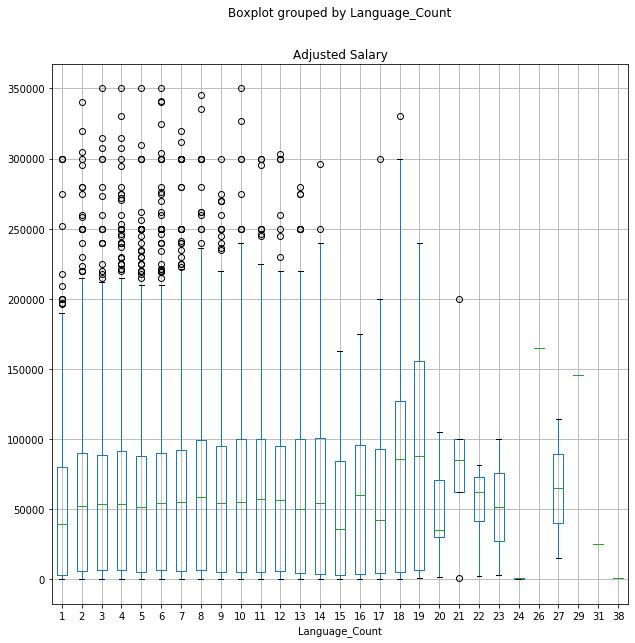

In [104]:
# Create a boxplot to compare the Language Count v. Salary across all countries 

final_df101.boxplot("Adjusted Salary", by="Language_Count", figsize=(10, 10))


In [105]:
#create groups for anova test 
group1 = final_df101[final_df101["Language_Count"] == 1]["Adjusted Salary"]
group2 = final_df101[final_df101["Language_Count"] == 2]["Adjusted Salary"]
group3 = final_df101[final_df101["Language_Count"] == 3]["Adjusted Salary"]
group4 = final_df101[final_df101["Language_Count"] == 4]["Adjusted Salary"]
group5 = final_df101[final_df101["Language_Count"] == 5]["Adjusted Salary"]
group6 = final_df101[final_df101["Language_Count"] == 6]["Adjusted Salary"]
group7 = final_df101[final_df101["Language_Count"] == 7]["Adjusted Salary"]
group8 = final_df101[final_df101["Language_Count"] == 8]["Adjusted Salary"]
group9 = final_df101[final_df101["Language_Count"] == 9]["Adjusted Salary"]
group10 = final_df101[final_df101["Language_Count"] == 10]["Adjusted Salary"]
group11 = final_df101[final_df101["Language_Count"] == 11]["Adjusted Salary"]
group12 = final_df101[final_df101["Language_Count"] == 12]["Adjusted Salary"]
group13 = final_df101[final_df101["Language_Count"] == 13]["Adjusted Salary"]
group14 = final_df101[final_df101["Language_Count"] == 14]["Adjusted Salary"]
group15 = final_df101[final_df101["Language_Count"] == 15]["Adjusted Salary"]
group16 = final_df101[final_df101["Language_Count"] == 16]["Adjusted Salary"]
group17 = final_df101[final_df101["Language_Count"] == 17]["Adjusted Salary"]
group18 = final_df101[final_df101["Language_Count"] == 18]["Adjusted Salary"]
group19 = final_df101[final_df101["Language_Count"] == 19]["Adjusted Salary"]
group20 = final_df101[final_df101["Language_Count"] == 20]["Adjusted Salary"]
group21 = final_df101[final_df101["Language_Count"] == 21]["Adjusted Salary"]
group22 = final_df101[final_df101["Language_Count"] == 22]["Adjusted Salary"]
group23 = final_df101[final_df101["Language_Count"] == 23]["Adjusted Salary"]
group24 = final_df101[final_df101["Language_Count"] == 24]["Adjusted Salary"]
group26 = final_df101[final_df101["Language_Count"] == 26]["Adjusted Salary"]
group27 = final_df101[final_df101["Language_Count"] == 27]["Adjusted Salary"]
group29 = final_df101[final_df101["Language_Count"] == 29]["Adjusted Salary"]
group31 = final_df101[final_df101["Language_Count"] == 31]["Adjusted Salary"]
group38 = final_df101[final_df101["Language_Count"] == 38]["Adjusted Salary"]


In [106]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11, group12, group13, group14, group15, group16, group17, group18, group19, group20, group21, group22, group23, group24, group26, group27, group29, group31, group38)


F_onewayResult(statistic=3.4749280883960094, pvalue=1.4494238708392523e-09)

================================================================================================================
Analysis: 
This is a box plot comparing Number of Coding Languages v Salary among cross country data

Hypothesis: If knowing more coding languages is related to an increase in salary, then knowing 6 or more coding languages will lead to a $10,0000 increase in one’s salary.  

pvalue=1.4494238708392523e-09
    We accept the hypothesis
================================================================================================================

In [107]:
# Now create a dataframe for with just currency = US Dollars for country compariosn 
US_langcount_df= final_df101[final_df101["Currency"] == "U.S. dollars ($)"]
US_langcount_df.head()

,Country,Salary,Currency,Gender,JobSatisfaction,EducationParents,Age,RaceEthnicity,JobSearchStatus,LastNewJob,LanguageWorkedWith,Adjusted Salary,languages,Language_Count
14938,United States,350000.0,U.S. dollars ($),Male,Moderately satisfied,"Other doctoral degree (Ph.D, Ed.D., etc.)",35 - 44 years old,White or of European descent,"I’m not actively looking, but I am open to new...",Between 1 and 2 years ago,C;C++;Python,350000.0,"[C, C++, Python]",3
28818,United States,350000.0,U.S. dollars ($),Male,Moderately satisfied,"Bachelor’s degree (BA, BS, B.Eng., etc.)",35 - 44 years old,White or of European descent,"I’m not actively looking, but I am open to new...",More than 4 years ago,C#;Java;Scala;HTML,350000.0,"[C#, Java, Scala, HTML]",4
43365,United States,350000.0,U.S. dollars ($),Male,Extremely satisfied,"Bachelor’s degree (BA, BS, B.Eng., etc.)",25 - 34 years old,White or of European descent,I am not interested in new job opportunities,Less than a year ago,C;C++;Hack;Objective-C;PHP;Swift,350000.0,"[C, C++, Hack, Objective-C, PHP, Swift]",6
40024,United States,350000.0,U.S. dollars ($),Male,Slightly dissatisfied,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",45 - 54 years old,Hispanic or Latino/Latina,"I’m not actively looking, but I am open to new...",More than 4 years ago,Assembly;C;C++;Java;JavaScript;Lua;Perl;SQL;Oc...,350000.0,"[Assembly, C, C++, Java, JavaScript, Lua, Perl...",10
37544,United States,350000.0,U.S. dollars ($),Male,Slightly dissatisfied,"Other doctoral degree (Ph.D, Ed.D., etc.)",35 - 44 years old,White or of European descent,"I’m not actively looking, but I am open to new...",Between 2 and 4 years ago,C;C++;C#;Objective-C;Python,350000.0,"[C, C++, C#, Objective-C, Python]",5


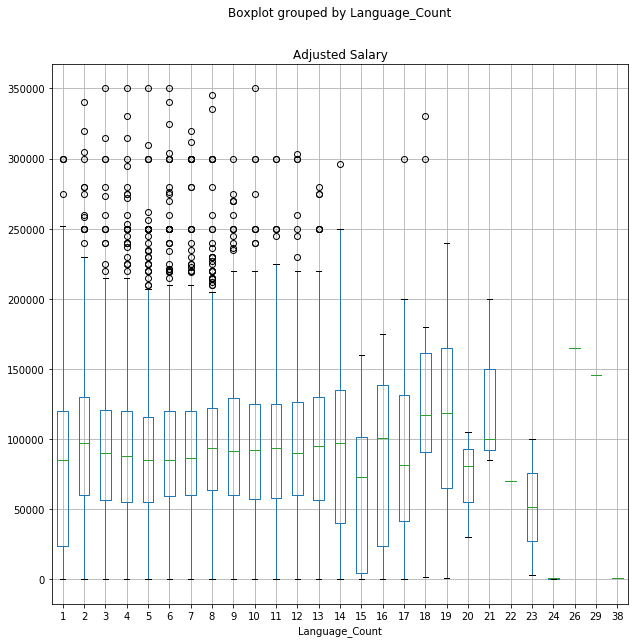

In [108]:
#Creat boxplot for Language count v Salary in US 
US_langcount_df.boxplot("Adjusted Salary", by="Language_Count", figsize=(10, 10))


In [110]:
#create groups for anova test 
group11 = US_langcount_df[US_langcount_df["Language_Count"] == 1]["Adjusted Salary"]
group21 = US_langcount_df[US_langcount_df["Language_Count"] == 2]["Adjusted Salary"]
group31 = US_langcount_df[US_langcount_df["Language_Count"] == 3]["Adjusted Salary"]
group41 = US_langcount_df[US_langcount_df["Language_Count"] == 4]["Adjusted Salary"]
group51 = US_langcount_df[US_langcount_df["Language_Count"] == 5]["Adjusted Salary"]
group61 = US_langcount_df[US_langcount_df["Language_Count"] == 6]["Adjusted Salary"]
group71 = US_langcount_df[US_langcount_df["Language_Count"] == 7]["Adjusted Salary"]
group81 = US_langcount_df[US_langcount_df["Language_Count"] == 8]["Adjusted Salary"]
group91 = US_langcount_df[US_langcount_df["Language_Count"] == 9]["Adjusted Salary"]
group101 = US_langcount_df[US_langcount_df["Language_Count"] == 10]["Adjusted Salary"]
group111 = US_langcount_df[US_langcount_df["Language_Count"] == 11]["Adjusted Salary"]
group121 = US_langcount_df[US_langcount_df["Language_Count"] == 12]["Adjusted Salary"]
group131 = US_langcount_df[US_langcount_df["Language_Count"] == 13]["Adjusted Salary"]
group141 = US_langcount_df[US_langcount_df["Language_Count"] == 14]["Adjusted Salary"]
group151 = US_langcount_df[US_langcount_df["Language_Count"] == 15]["Adjusted Salary"]
group161 = US_langcount_df[US_langcount_df["Language_Count"] == 16]["Adjusted Salary"]
group171 = US_langcount_df[US_langcount_df["Language_Count"] == 17]["Adjusted Salary"]
group181 = US_langcount_df[US_langcount_df["Language_Count"] == 18]["Adjusted Salary"]
group191 = US_langcount_df[US_langcount_df["Language_Count"] == 19]["Adjusted Salary"]
group201 = US_langcount_df[US_langcount_df["Language_Count"] == 20]["Adjusted Salary"]
group211 = US_langcount_df[US_langcount_df["Language_Count"] == 21]["Adjusted Salary"]
group221 = US_langcount_df[US_langcount_df["Language_Count"] == 22]["Adjusted Salary"]
group231 = US_langcount_df[US_langcount_df["Language_Count"] == 23]["Adjusted Salary"]
group241 = US_langcount_df[US_langcount_df["Language_Count"] == 24]["Adjusted Salary"]
group261 = US_langcount_df[US_langcount_df["Language_Count"] == 26]["Adjusted Salary"]
group291 = US_langcount_df[US_langcount_df["Language_Count"] == 29]["Adjusted Salary"]
group381 = US_langcount_df[US_langcount_df["Language_Count"] == 38]["Adjusted Salary"]


In [112]:
# Perform the ANOVA
stats.f_oneway(group11, group21, group31, group41, group51, group61, group71, group81, group91, group101, group111, group121, group131, group141, group151, group161, group171, group181, group191, group201, group211, group221, group231, group241, group261, group291, group381)


F_onewayResult(statistic=3.3173814009100684, pvalue=2.383723155195943e-08)

================================================================================================================
Analysis: 
This is a box plot comparing Number of Coding Languages v Salary among US Dollar respondents 

Hypothesis: If knowing more coding languages is related to an increase in salary, then knowing 6 or more coding languages will lead to a $10,0000 increase in one’s salary.  

pvalue=2.383723155195943e-08
    We accept the hypothesis
================================================================================================================

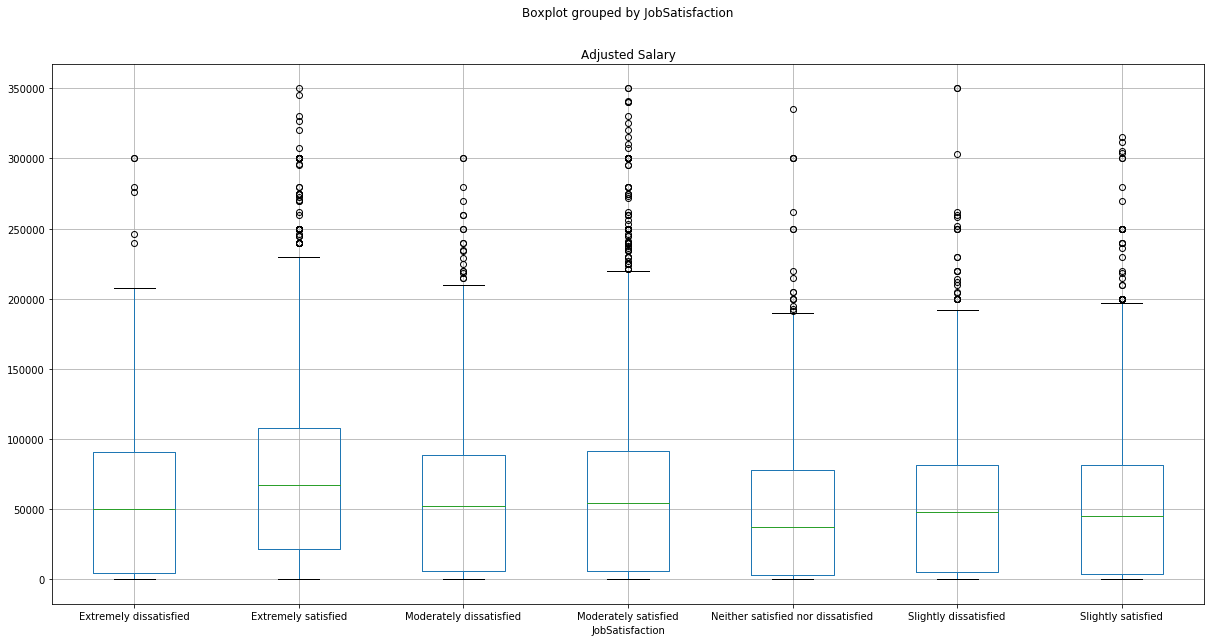

In [113]:
#Plot a box plot comparing Salary v Job Satisfaction among all countries 
final_df101.boxplot("Adjusted Salary", by="JobSatisfaction", figsize=(20, 10))

In [114]:
#create groups for anova test 
group_1 = final_df101[final_df101["JobSatisfaction"] == "Extremely dissatisfied"]["Adjusted Salary"]
group_2 = final_df101[final_df101["JobSatisfaction"] == "Extremely satisfied"]["Adjusted Salary"]
group_3 = final_df101[final_df101["JobSatisfaction"] == "Moderately dissatisfied"]["Adjusted Salary"]
group_4 = final_df101[final_df101["JobSatisfaction"] == "Moderately satisfied"]["Adjusted Salary"]
group_5 = final_df101[final_df101["JobSatisfaction"] == "Neither satisfied nor dissatisfied"]["Adjusted Salary"]
group_6 = final_df101[final_df101["JobSatisfaction"] == "Slightly dissatisfied"]["Adjusted Salary"]
group_7 = final_df101[final_df101["JobSatisfaction"] == "Slightly satisfied"]["Adjusted Salary"]



In [115]:
# Perform the ANOVA
stats.f_oneway(group_1, group_2, group_3, group_4, group_5, group_6, group_7)

F_onewayResult(statistic=79.1744039981114, pvalue=1.517146416375882e-98)

================================================================================================================
Analysis: 

Box plot comparing Job Satisfaction to Salary among cross country respondents

Hypothesis: If job satisfaction is related to an increase in salary, then having a salary in the top 25% of respondents will lead to higher job satisfaction.  
pvalue=1.517146416375882e-98
    We accept the hypothesis


================================================================================================================

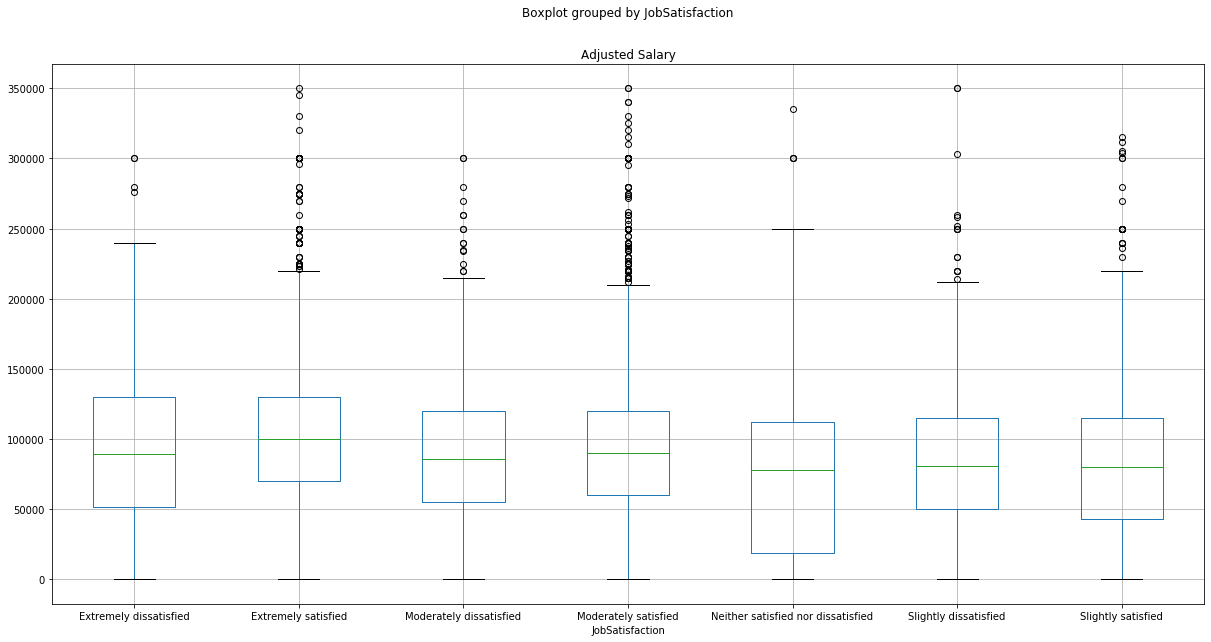

In [129]:
# Now Create a boxplot comparing Salary v Job Satisfaction in US Data Only
US_langcount_df.boxplot("Adjusted Salary", by="JobSatisfaction", figsize=(20, 10))

In [117]:
#create groups for anova test 
group_1 = US_langcount_df[US_langcount_df["JobSatisfaction"] == "Extremely dissatisfied"]["Adjusted Salary"]
group_2 = US_langcount_df[US_langcount_df["JobSatisfaction"] == "Extremely satisfied"]["Adjusted Salary"]
group_3 = US_langcount_df[US_langcount_df["JobSatisfaction"] == "Moderately dissatisfied"]["Adjusted Salary"]
group_4 = US_langcount_df[US_langcount_df["JobSatisfaction"] == "Moderately satisfied"]["Adjusted Salary"]
group_5 = US_langcount_df[US_langcount_df["JobSatisfaction"] == "Neither satisfied nor dissatisfied"]["Adjusted Salary"]
group_6 = US_langcount_df[US_langcount_df["JobSatisfaction"] == "Slightly dissatisfied"]["Adjusted Salary"]
group_7 = US_langcount_df[US_langcount_df["JobSatisfaction"] == "Slightly satisfied"]["Adjusted Salary"]


In [118]:
# Perform the ANOVA
stats.f_oneway(group_1, group_2, group_3, group_4, group_5, group_6, group_7)

F_onewayResult(statistic=38.00810671987146, pvalue=5.306561636695507e-46)

================================================================================================================
Analysis: 

Box plot comparing Job Satisfaction to Salary among USD respondents

Hypothesis: If job satisfaction is related to an increase in salary, then having a salary in the top 25% of respondents will lead to higher job satisfaction.  
pvalue=5.306561636695507e-46
    We accept the hypothesis


================================================================================================================

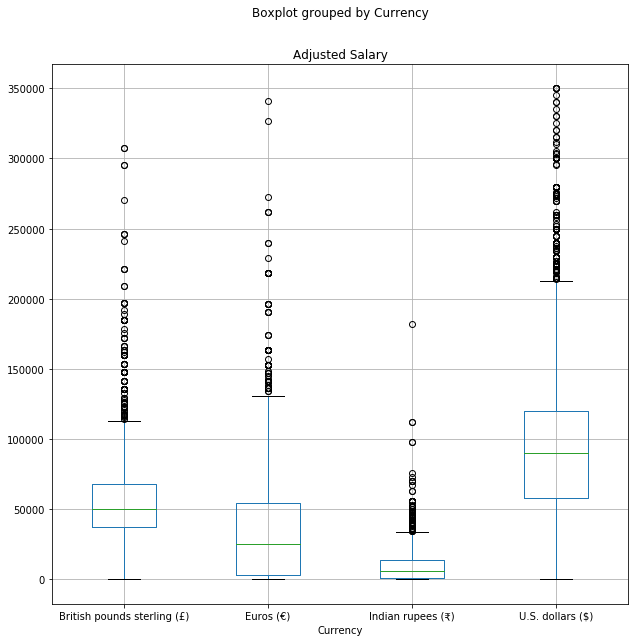

In [119]:
# Create a boxplot to compare Salary in 4 countries  
final_df101.boxplot("Adjusted Salary", by="Currency", figsize=(10, 10))

In [120]:
#create groups for anova test 
group__1 = final_df101[final_df101["Currency"] == "British pounds sterling (£)"]["Adjusted Salary"]
group__2 = final_df101[final_df101["Currency"] == "Euros (€)"]["Adjusted Salary"]
group__3 = final_df101[final_df101["Currency"] == "Indian rupees (₹)"]["Adjusted Salary"]
group__4 = final_df101[final_df101["Currency"] == "U.S. dollars ($)"]["Adjusted Salary"]

In [121]:
# Perform the ANOVA
stats.f_oneway(group__1, group__2, group__3, group__4)

F_onewayResult(statistic=4010.333233993004, pvalue=0.0)

================================================================================================================
Analysis: 

Box plot comparing Salary to Currency

Hypothesis: If the currency type is related to salary amount,  then the US Dollar  will have a higher average salary  

pvalue= 0.0
    
    We accept the hypothesis

================================================================================================================

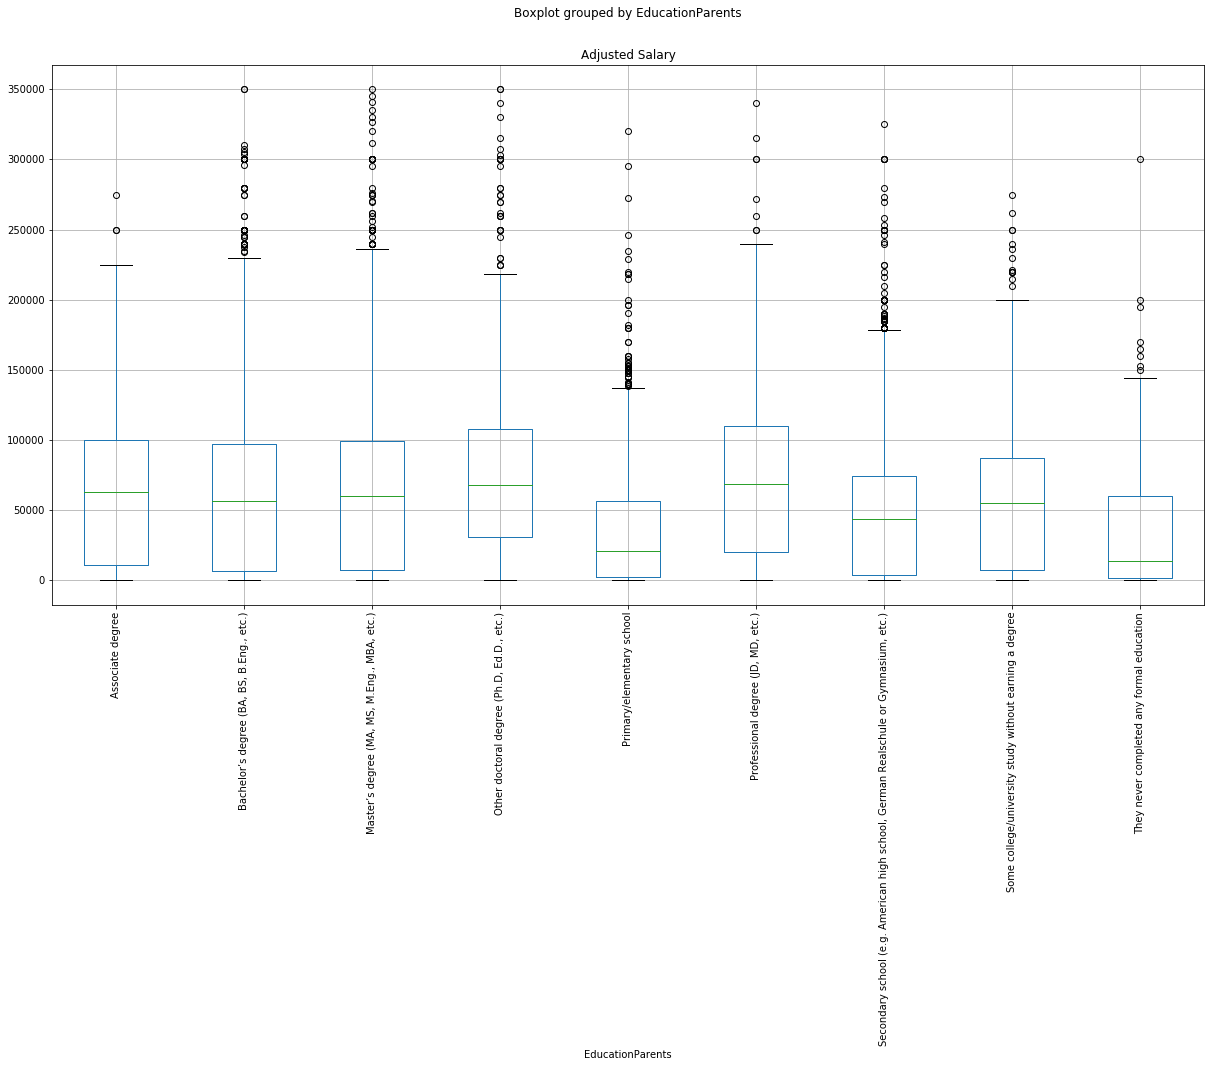

In [122]:
# Create a boxplot to compare Parent's education level and salary among all countries 
final_df101.boxplot("Adjusted Salary", by="EducationParents", figsize=(20, 10), rot = "vertical")

In [123]:
#create groups for anova test 
ed_group__1 = final_df101[final_df101["EducationParents"] == "Associate degree"]["Adjusted Salary"]
ed_group__2 = final_df101[final_df101["EducationParents"] == "Bachelor’s degree (BA, BS, B.Eng., etc.)"]["Adjusted Salary"]
ed_group__3 = final_df101[final_df101["EducationParents"] == "Master’s degree (MA, MS, M.Eng., MBA, etc.)"]["Adjusted Salary"]
ed_group__4 = final_df101[final_df101["EducationParents"] == "Other doctoral degree (Ph.D, Ed.D., etc.)"]["Adjusted Salary"]
ed_group__5 = final_df101[final_df101["EducationParents"] == "Primary/elementary school"]["Adjusted Salary"]
ed_group__6 = final_df101[final_df101["EducationParents"] == "Professional degree (JD, MD, etc.)"]["Adjusted Salary"]
ed_group__7 = final_df101[final_df101["EducationParents"] == "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)"]["Adjusted Salary"]
ed_group__8 = final_df101[final_df101["EducationParents"] == "Some college/university study without earning a degree"]["Adjusted Salary"]
ed_group__9 = final_df101[final_df101["EducationParents"] == "They never completed any formal education"]["Adjusted Salary"]


In [124]:
# Perform the ANOVA
stats.f_oneway(ed_group__1, ed_group__2, ed_group__3, ed_group__4, ed_group__5, ed_group__6, ed_group__7, ed_group__8, ed_group__9)


F_onewayResult(statistic=93.50566511468624, pvalue=4.813868786873509e-154)

================================================================================================================
Analysis: 

Box plot comparing Parents Education Level to Salary among cross country respondents

Hypothesis: If having parents with higher salary levels is related to higher salaries,  then the respondents who have parents with professional degrees will have salaries greater than the average salary

pvalue=4.813868786873509e-154
    We accept the hypothesis

================================================================================================================

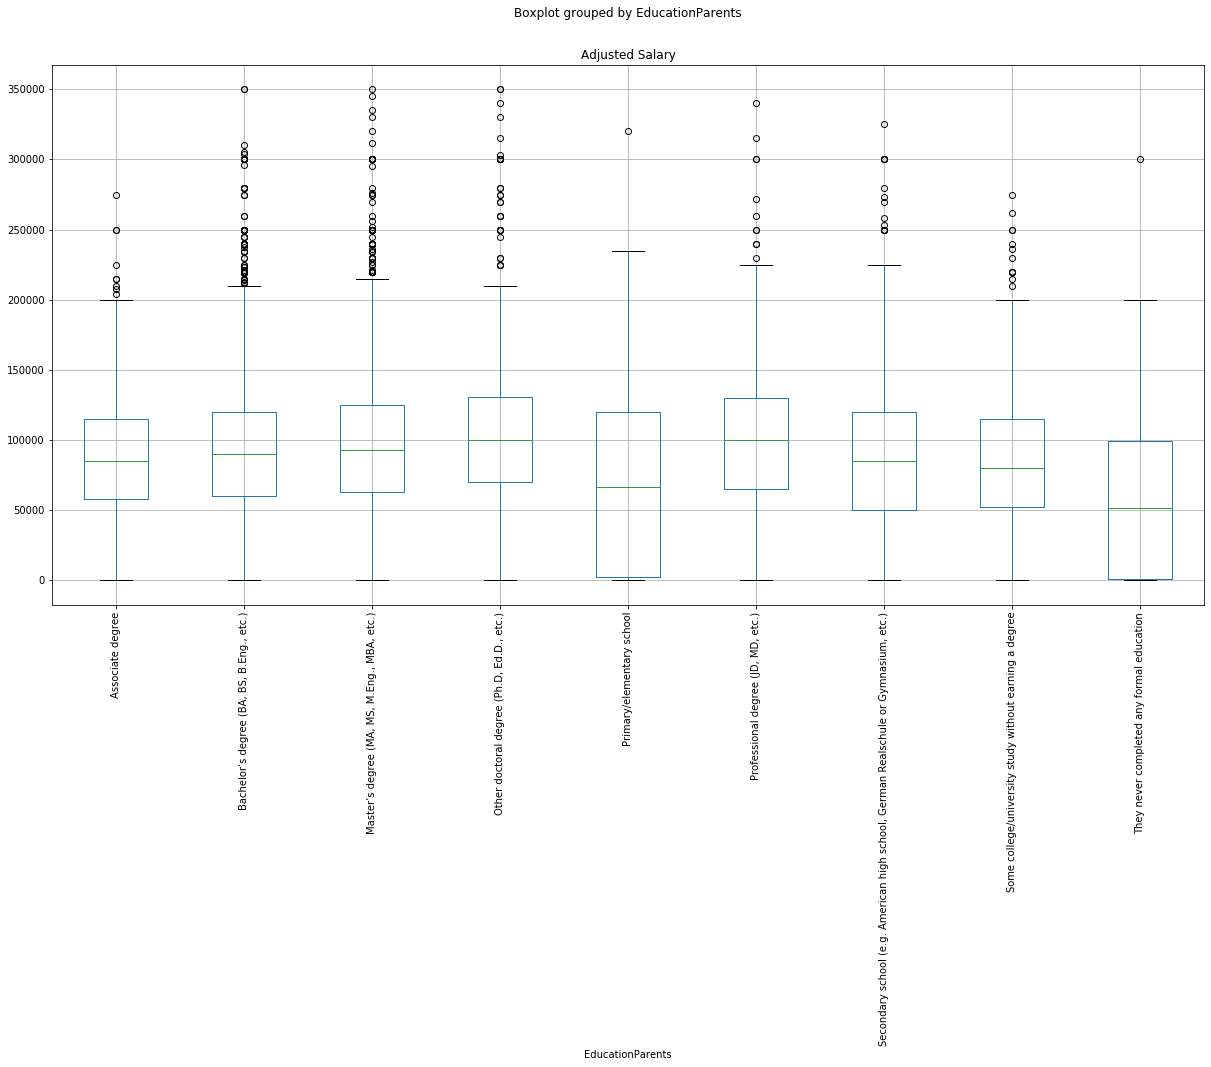

In [125]:
# Now Perform Parents education v Salary on US Data Only
US_langcount_df.boxplot("Adjusted Salary", by="EducationParents", figsize=(20, 10), rot = "vertical")

In [126]:
#create groups for anova test 
ed_group__10 = US_langcount_df[US_langcount_df["EducationParents"] == "Associate degree"]["Adjusted Salary"]
ed_group__20 = US_langcount_df[US_langcount_df["EducationParents"] == "Bachelor’s degree (BA, BS, B.Eng., etc.)"]["Adjusted Salary"]
ed_group__30 = US_langcount_df[US_langcount_df["EducationParents"] == "Master’s degree (MA, MS, M.Eng., MBA, etc.)"]["Adjusted Salary"]
ed_group__40 = US_langcount_df[US_langcount_df["EducationParents"] == "Other doctoral degree (Ph.D, Ed.D., etc.)"]["Adjusted Salary"]
ed_group__50 = US_langcount_df[US_langcount_df["EducationParents"] == "Primary/elementary school"]["Adjusted Salary"]
ed_group__60 = US_langcount_df[US_langcount_df["EducationParents"] == "Professional degree (JD, MD, etc.)"]["Adjusted Salary"]
ed_group__70 = US_langcount_df[US_langcount_df["EducationParents"] == "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)"]["Adjusted Salary"]
ed_group__80 = US_langcount_df[US_langcount_df["EducationParents"] == "Some college/university study without earning a degree"]["Adjusted Salary"]
ed_group__90 = US_langcount_df[US_langcount_df["EducationParents"] == "They never completed any formal education"]["Adjusted Salary"]


In [127]:
# Perform the ANOVA
stats.f_oneway(ed_group__10, ed_group__20, ed_group__30, ed_group__40, ed_group__50, ed_group__60, ed_group__70, ed_group__80, ed_group__90)


F_onewayResult(statistic=24.77912730746462, pvalue=3.09534557021347e-38)

================================================================================================================
Analysis: 

Box plot comparing Parents Education Level to Salary among USD respondents

Hypothesis: If having parents with higher salary levels is related to higher salaries,  then the respondents who have parents with professional degrees will have salaries greater than the average salary

pvalue=3.09534557021347e-38
    We accept the hypothesis

================================================================================================================

Statistically Significant Conclusions

1)Knowing more coding languages is associated with an increase in salary
2)Higher job satisfaction is associated with higher salaries
3)US Developers have a higher adjusted salary as compared to the Eurozone, UK, and India
4)Having parents with higher education levels, such as a bachelors or doctoral degree is associated with higher salary 

Implications

1) Many variables effect developer earning potential
2) Learning more coding languages can lead to higher salaries 
3) Job satisfaction can be reached by striving for higher salaries 
4) Higher adjusted salaries for developers in the US 
